In [4]:
from pathlib import Path

path = '../img-caption/examples'
for f in Path(path).iterdir():
    if f.is_file(): 
        print(f)

../img-caption/examples/dog-niemiecki.jpeg
../img-caption/examples/syd_mead.jpg


In [10]:
from transformers import AutoProcessor
from transformers import AutoModelForCausalLM

checkpoint = "microsoft/git-base"
processor = AutoProcessor.from_pretrained(checkpoint)
model = AutoModelForCausalLM.from_pretrained(checkpoint)

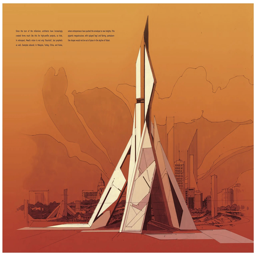

In [11]:
from PIL import Image

image = Image.open('./images/syd_mead.jpg')
image.resize((256, 256))

In [17]:
inputs = processor(images=image, return_tensors="pt")
pixel_values = inputs.pixel_values
pixel_values[0, 0]

tensor([[1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
        [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
        [1.8135, 1.8135, 1.8135,  ..., 1.8281, 1.8281, 1.8281],
        ...,
        [1.6676, 1.6676, 1.6822,  ..., 1.6822, 1.6822, 1.6822],
        [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
        [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303]])

In [18]:
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

the city of the future


In [21]:
supported_exts = (".png", ".jpg", ".jpeg", ".bmp", ".txt")
[*supported_exts, ".txt"]

['.png', '.jpg', '.jpeg', '.bmp', '.txt', '.txt']

In [24]:
from pathlib import Path
Path('./images/') in list(Path('./').iterdir())

True

In [3]:
# import threading
import multiprocessing as mp
import tkinter as tk
from pathlib import Path
from tkinter import *


class App(tk.Frame):
    def __init__(self, root):
        self.root = root

        self.string_var = tk.StringVar(self.root, "")
        self.string_var.trace_add("write", self.update_caption)
        
        self.caption = tk.Entry(textvariable=self.string_var)
        self.caption.pack()

        self.btn = tk.Button(self.root, command=self.foo, text="klik")
        self.btn.pack()

    def update_caption(self, *args):
        print(self.string_var.get())

    def foo(self):
        self.string_var.set("dupa")


if __name__ == "__main__":
    root = tk.Tk()
    app = App(root)
    root.mainloop()

dupa


In [3]:
import multiprocessing as mp
import tkinter as tk
from pathlib import Path
from tkinter import *
import time


class App(tk.Frame):
    def __init__(self, root):
        self.root = root
        self.root.geometry('200x100')

        self.btn = tk.Button(self.root, command=self.main_foo, text="klik")
        self.btn.pack()

    def main_foo(self):
        q = mp.Queue()
        process = mp.Process(target=self.process_foo, args=(q,))
        process.start()  # TODO: how to make it that it not freeze the app???
        main_bar = q.get()
        print(main_bar[:10])

    def process_foo(self, q):
        try:
            process_bar = []
            for i in range(500):
                time.sleep(0.01)
                process_bar.append(i**4 - (i / 100))
            q.put(process_bar)
        except Exception as e:
            print(e)


if __name__ == "__main__":
    root = tk.Tk()
    app = App(root)
    root.mainloop()

[0.0, 0.99, 15.98, 80.97, 255.96, 624.95, 1295.94, 2400.93, 4095.92, 6560.91]


In [3]:
import tkinter as tk
import multiprocessing as mp
import time

class App(tk.Frame):
    def __init__(self, root):
        self.root = root
        self.root.geometry('200x100')

        self.btn = tk.Button(self.root, command=self.main_foo, text="klik")
        self.btn.pack()

        self.q = mp.Queue()
        self.process = None

    def main_foo(self):
        self.check_process_status()
        self.process = mp.Process(target=self.process_foo, args=(self.q,))
        self.process.start()

    def process_foo(self, q):
        print('new process created')
        try:
            process_bar = []
            for i in range(5):
                time.sleep(1)
                process_bar.append(i ** 4 - (i / 100))
            q.put(process_bar)
        except Exception as e:
            print(e)

    def check_process_status(self):
        if self.process and not self.process.is_alive():
            main_bar = self.q.get()
            print(main_bar)
            self.process.join()
            self.process = None
            print("process terminated")
            return
        self.root.after(100, self.check_process_status)
        print(".")

if __name__ == "__main__":
    root = tk.Tk()
    app = App(root)
    root.mainloop()


.
new process created
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
[0.0, 0.99, 15.98, 80.97, 255.96]
process terminated
.
new process created
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
[0.0, 0.99, 15.98, 80.97, 255.96]
process terminated


In [5]:
from tkinter import Tk, Frame, Label, Entry, Button

root = Tk()
root.geometry('500x400')

Label(root, text='Enter info below').pack(side=tk.LEFT)
Entry(root).pack(side=tk.LEFT)
Button(root, text='Submit').pack(side=tk.LEFT)

root.mainloop()

In [7]:
from multiprocessing import Process, Queue
import time
import random

def worker(q_in, q_out):
    while True:
        if not q_in.empty():
            item = q_in.get()
            result = item ** 2
            time.sleep(3)
            q_out.put(result)


class App(tk.Frame):
    def __init__(self, root):
        self.root = root
        self.root.geometry('200x100')

        self.btn = tk.Button(self.root, command=self.send_req, text="klik")
        self.btn.pack()

        self.q_in = Queue()
        self.q_out = Queue()

        self.process = Process(target=worker, args=(self.q_in, self.q_out))
        self.process.start()
        self.check_process_status()

    def send_req(self):
        req = random.randint(0, 100)
        print(f'req: {req}')
        self.q_in.put(req)

    def check_process_status(self):
        if not self.q_out.empty():
            res = self.q_out.get()
            print(f'res: {res}')
        self.root.after(100, self.check_process_status)
        print(".", end="")

if __name__ == "__main__":
    root = tk.Tk()
    app = App(root)
    root.mainloop()

..............................req: 54
..............................res: 2916
........................req: 41
..............................res: 1681
...........................................................................req: 51
..............................res: 2601
............................